In [11]:
%run ./Functions_PM_Irvin2.ipynb

m_1 = b1_mass = M_sun
m_2 = b2_mass = M_sun

R_S = 2*(b1_mass + b2_mass)*G/c**2

mass_bin = b1_mass + b2_mass
SMA_bin = 100*R_S
v_redmass = np.sqrt(G*mass_bin/SMA_bin)
x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

In [1]:
%run ./Functions_PM_Irvin2.ipynb

m_1 = 1e-4
m_2 = 1

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([1000, 0.])
x_2 = np.array([0.,   0.])
v_1 = np.array([0., 0.01])
v_2 = np.array([0.,    0])
# s = x_1, x_2, v_1, v_2, m_1, m_2

In [2]:
# t_max = 2*np.pi*np.sqrt(rel_len(x_1, x_2)**3/(G*(m_1 + m_2)))
# res = 1e4
# dt = t_max/res

t_max = 202750*3
dt = 2

pos1 = np.zeros((2, int(t_max/dt)))
pos2 = np.zeros((2, int(t_max/dt)))
vel1 = np.zeros((2, int(t_max/dt)))
vel2 = np.zeros((2, int(t_max/dt)))
acc1 = np.zeros((2, int(t_max/dt)))
acc2 = np.zeros((2, int(t_max/dt)))

for i in range(int(t_max/dt)):
    pos1[:,i] = x_1
    pos2[:,i] = x_2
    vel1[:,i] = v_1
    vel2[:,i] = v_2

    a_1, a_2 = accelerationPM(x_1, x_2, v_1, v_2, m_1, m_2, DL=True)

    acc1[:,i] = a_1
    acc2[:,i] = a_2
    x_1, x_2 = move(x_1, x_2, v_1, v_2, dt)
    v_1, v_2 = boost(v_1, v_2, a_1, a_2, dt)
    

In [3]:
pos1

array([[ 1.00000000e+03,  9.99999996e+02,  9.99999988e+02, ...,
        -9.25990166e+02, -9.25995121e+02, -9.26000073e+02],
       [ 0.00000000e+00,  2.00000000e-02,  3.99999999e-02, ...,
         7.33256466e+02,  7.33238721e+02,  7.33220975e+02]])

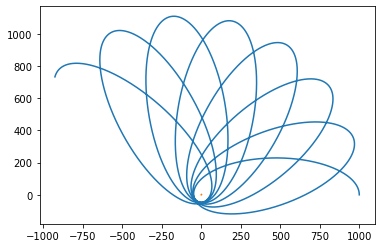

In [7]:
plt.figure()
plt.plot(pos1[0], pos1[1])
plt.plot(pos1[0][0], pos1[1][0], 'bx')
plt.plot(pos2[0], pos2[1])
plt.plot(pos2[0][0], pos2[1][0], 'rx')

In [5]:
pos1, vel1, acc1

(array([[ 2.95325008e+05,  2.95325008e+05,  2.95325008e+05, ...,
          2.95325008e+05,  2.95325008e+05,  2.95325008e+05],
        [ 0.00000000e+00,  1.75067038e-02, -1.06018885e+01, ...,
         -5.75108569e+07, -5.75021858e+07, -5.74935120e+07]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 array([[-1.81943478e-14, -1.81943478e-14, -1.81943478e-14, ...,
         -2.46360154e-21, -2.46471618e-21, -2.46583184e-21],
        [-0.00000000e+00, -3.47061459e+04,  2.10177023e+07, ...,
          2.82921578e+07,  2.83006808e+07,  2.83092103e+07]]))